In [1]:
from datasets import load_dataset

dataset = load_dataset("mrm8488/goemotions")
train_data = dataset["train"]


c:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [ ]:
print(f"Rows: {train_data.num_rows}, Columns: {len(train_data.column_names)}")

print(train_data.column_names)

Rows: 211225, Columns: 37
['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [ ]:
df = train_data.to_pandas()
print(df.dtypes)


text                     object
id                       object
author                   object
subreddit                object
link_id                  object
parent_id                object
created_utc             float64
rater_id                  int64
example_very_unclear       bool
admiration                int64
amusement                 int64
anger                     int64
annoyance                 int64
approval                  int64
caring                    int64
confusion                 int64
curiosity                 int64
desire                    int64
disappointment            int64
disapproval               int64
disgust                   int64
embarrassment             int64
excitement                int64
fear                      int64
gratitude                 int64
grief                     int64
joy                       int64
love                      int64
nervousness               int64
optimism                  int64
pride                     int64
realizat

In [4]:
print(df.isnull().sum())


text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64


Repo card metadata block was not found. Setting CardData to empty.


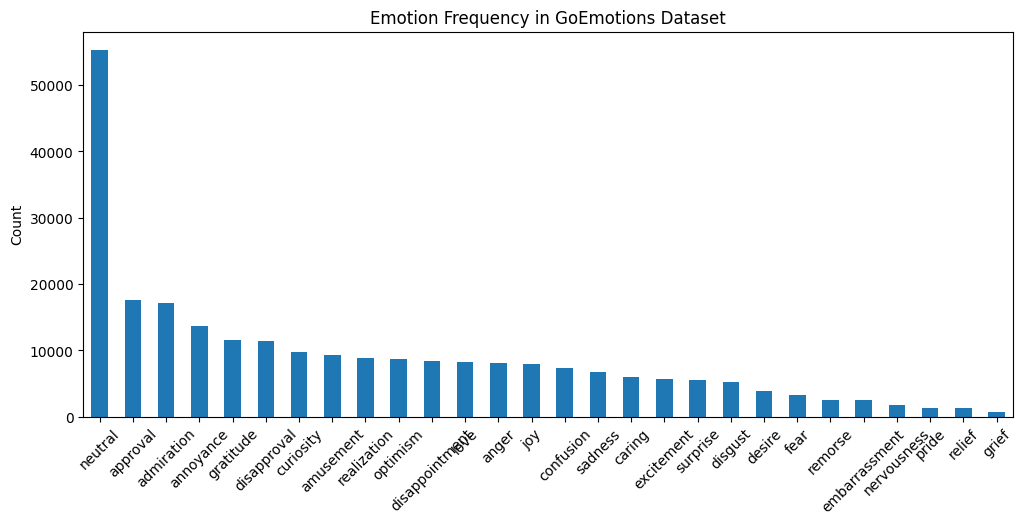

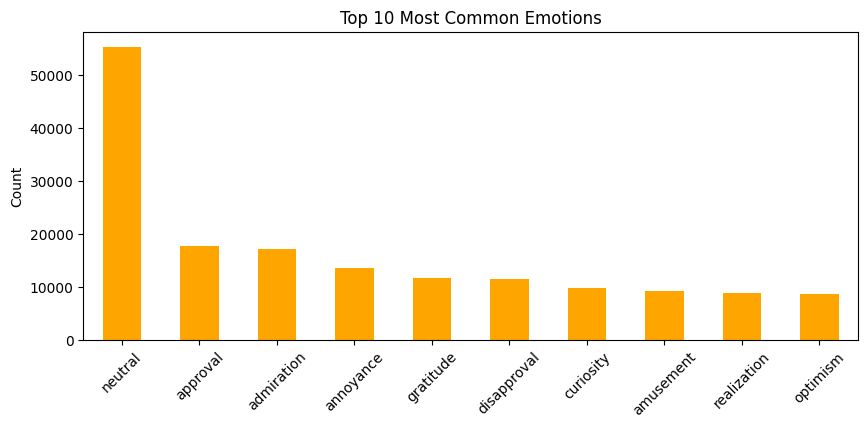

C:\Users\shash\AppData\Local\Temp\ipykernel_31816\1956895998.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emotions["num_emotions"] = df_emotions.sum(axis=1)


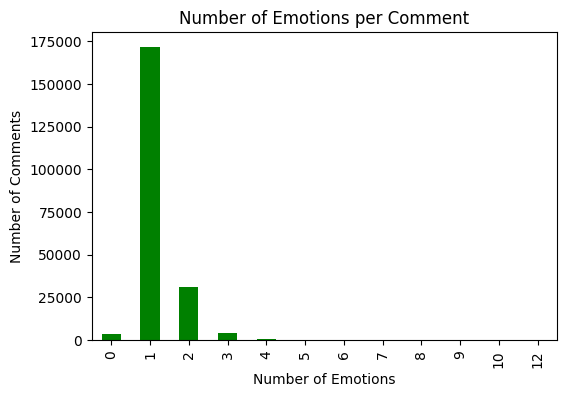

In [9]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = load_dataset("mrm8488/goemotions")
df = dataset["train"].to_pandas()

# 1️⃣ Identify only emotion label columns (numeric, and exclude metadata)
meta_cols = [
    'text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
    'created_utc', 'rater_id', 'example_very_unclear'
]
emotion_cols = [col for col in df.columns if col not in meta_cols and pd.api.types.is_numeric_dtype(df[col])]

# 2️⃣ Create separate DataFrame for emotions
df_emotions = df[emotion_cols]

# 3️⃣ Frequency of each emotion
label_counts = df_emotions.sum().sort_values(ascending=False)

# 4️⃣ Plot: Bar chart of emotion frequencies
plt.figure(figsize=(12,5))
label_counts.plot(kind='bar')
plt.title("Emotion Frequency in GoEmotions Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Plot: Top 10 most common emotions
plt.figure(figsize=(10,4))
label_counts.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Emotions")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 6️⃣ Plot: Distribution of number of emotions per comment
df_emotions["num_emotions"] = df_emotions.sum(axis=1)
plt.figure(figsize=(6,4))
df_emotions["num_emotions"].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Number of Emotions per Comment")
plt.xlabel("Number of Emotions")
plt.ylabel("Number of Comments")
plt.show()


In [ ]:
# 1. Imports & Load Dataset
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Load GoEmotions dataset
dataset = load_dataset("mrm8488/goemotions")
df = dataset["train"].to_pandas()

# 2. Extract Emotion Columns
meta_cols = [
    'text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
    'created_utc', 'rater_id', 'example_very_unclear'
]
emotion_cols = [col for col in df.columns if col not in meta_cols and pd.api.types.is_numeric_dtype(df[col])]
df_emotions = df[emotion_cols]


Repo card metadata block was not found. Setting CardData to empty.


C:\Users\shash\AppData\Local\Temp\ipykernel_31816\3678047512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emotions["num_emotions"] = df_emotions.sum(axis=1)


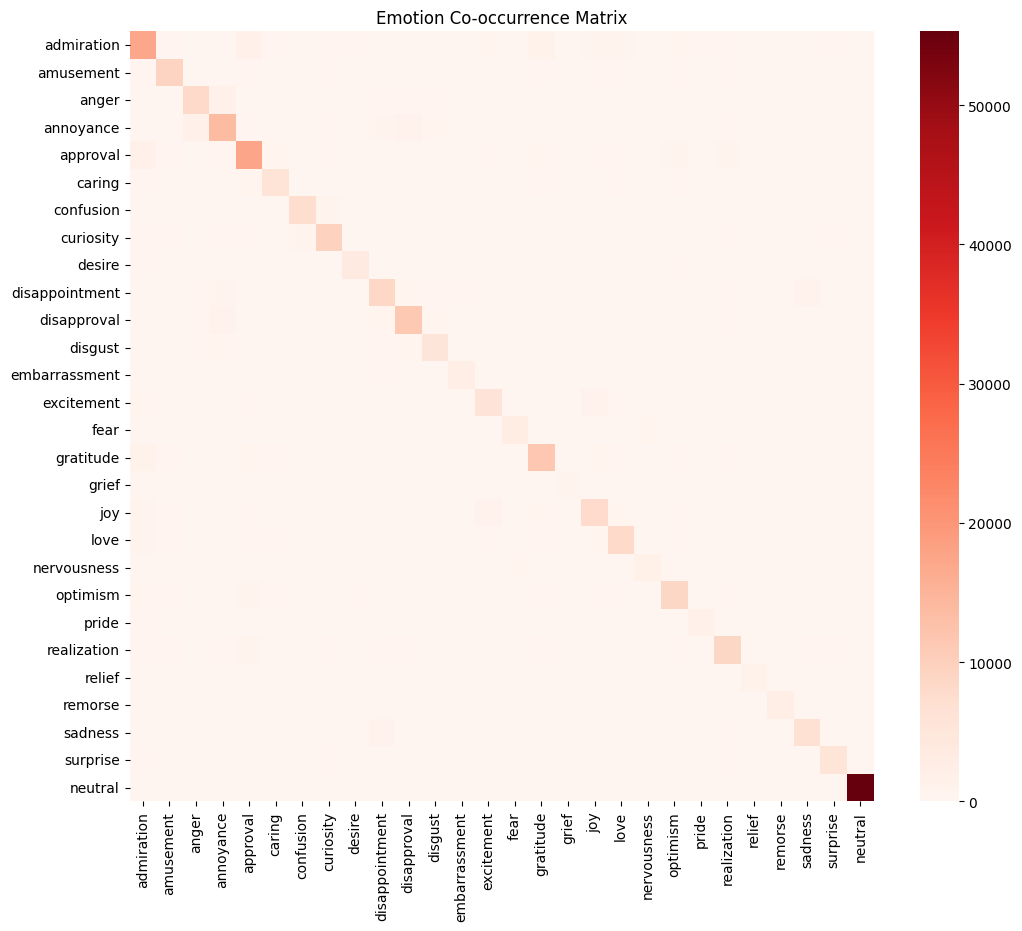

In [14]:
import numpy as np

# Make sure num_emotions exists
df_emotions["num_emotions"] = df_emotions.sum(axis=1)

# Compute co-occurrence counts
co_occurrence = np.dot(df_emotions.drop(columns=["num_emotions"]).T, 
                       df_emotions.drop(columns=["num_emotions"]))

# Convert to DataFrame
co_matrix = pd.DataFrame(co_occurrence, 
                         index=emotion_cols, 
                         columns=emotion_cols)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(co_matrix, cmap="Reds", annot=False)
plt.title("Emotion Co-occurrence Matrix")
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df_emotions.drop(columns=["num_emotions"]), test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = MultiOutputClassifier(LogisticRegression(max_iter=200))
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print("Classification Report (Baseline Model):")
print(classification_report(y_test, y_pred, target_names=emotion_cols))

Classification Report (Baseline Model):
                precision    recall  f1-score   support

    admiration       0.69      0.28      0.40      3456
     amusement       0.59      0.29      0.39      1891
         anger       0.53      0.09      0.15      1628
     annoyance       0.34      0.02      0.04      2722
      approval       0.60      0.03      0.06      3418
        caring       0.50      0.05      0.09      1147
     confusion       0.50      0.04      0.07      1463
     curiosity       0.52      0.05      0.10      1941
        desire       0.45      0.07      0.13       758
disappointment       0.54      0.02      0.04      1671
   disapproval       0.48      0.02      0.05      2289
       disgust       0.54      0.07      0.13      1074
 embarrassment       0.59      0.03      0.05       502
    excitement       0.60      0.05      0.09      1121
          fear       0.61      0.15      0.24       625
     gratitude       0.89      0.71      0.79      2330
       

c:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

In [16]:
X_embeddings = vectorizer.transform(df["text"])
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_embeddings)

df["cluster"] = clusters
print(df.groupby("cluster").size())

cluster
0     26788
1     12190
2     29830
3    110707
4     31710
dtype: int64


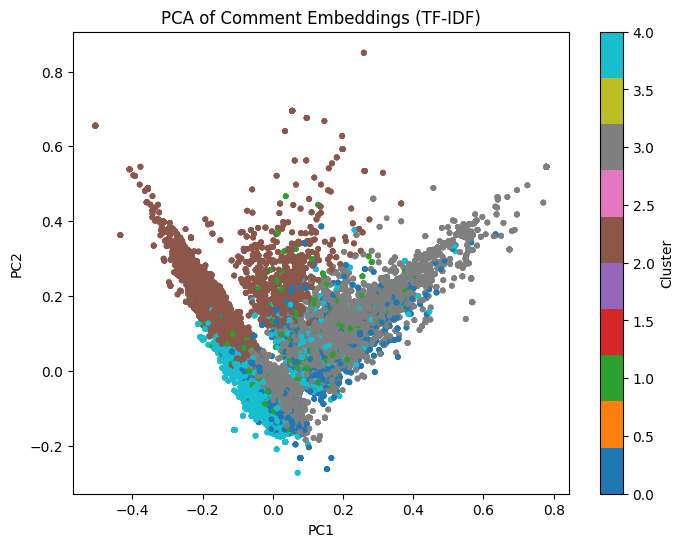

In [17]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_embeddings.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="tab10", s=10)
plt.title("PCA of Comment Embeddings (TF-IDF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

In [18]:
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())


count    211225.000000
mean         69.299572
std          36.536746
min           2.000000
25%          39.000000
50%          67.000000
75%          97.000000
max         703.000000
Name: text_length, dtype: float64


In [19]:
df['num_labels'] = df[emotion_cols].sum(axis=1)
print(df['num_labels'].value_counts())


num_labels
1     171820
2      31187
3       4218
0       3411
4        399
5        106
6         53
7         20
8          6
9          3
10         1
12         1
Name: count, dtype: int64


In [20]:
# Random comment with its labels
sample = df.sample(1)
print("Text:", sample['text'].values[0])
print("Labels:", sample[emotion_cols].iloc[0].to_dict())


Text: Glad to hear it :) definitely more on the way!
Labels: {'admiration': 0, 'amusement': 0, 'anger': 0, 'annoyance': 0, 'approval': 0, 'caring': 0, 'confusion': 0, 'curiosity': 0, 'desire': 0, 'disappointment': 0, 'disapproval': 0, 'disgust': 0, 'embarrassment': 0, 'excitement': 0, 'fear': 0, 'gratitude': 0, 'grief': 0, 'joy': 1, 'love': 0, 'nervousness': 0, 'optimism': 0, 'pride': 0, 'realization': 0, 'relief': 0, 'remorse': 0, 'sadness': 0, 'surprise': 0, 'neutral': 0}
